# D. 

In [1]:
import pandas as pd

from catboost import CatBoostRegressor, cv, Pool

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv('input/d_train.txt', sep='\t', header=None)
df = df.drop([0, 2, 3], axis=1)
df.columns = ['target'] + list(range(500))

In [3]:
pool = Pool(df.drop('target', axis=1), df['target'])
model = CatBoostRegressor(n_estimators=200, learning_rate=0.1)
model.fit(pool, verbose=False);

In [4]:
feature_importance = pd.DataFrame(model.get_feature_importance(pool))

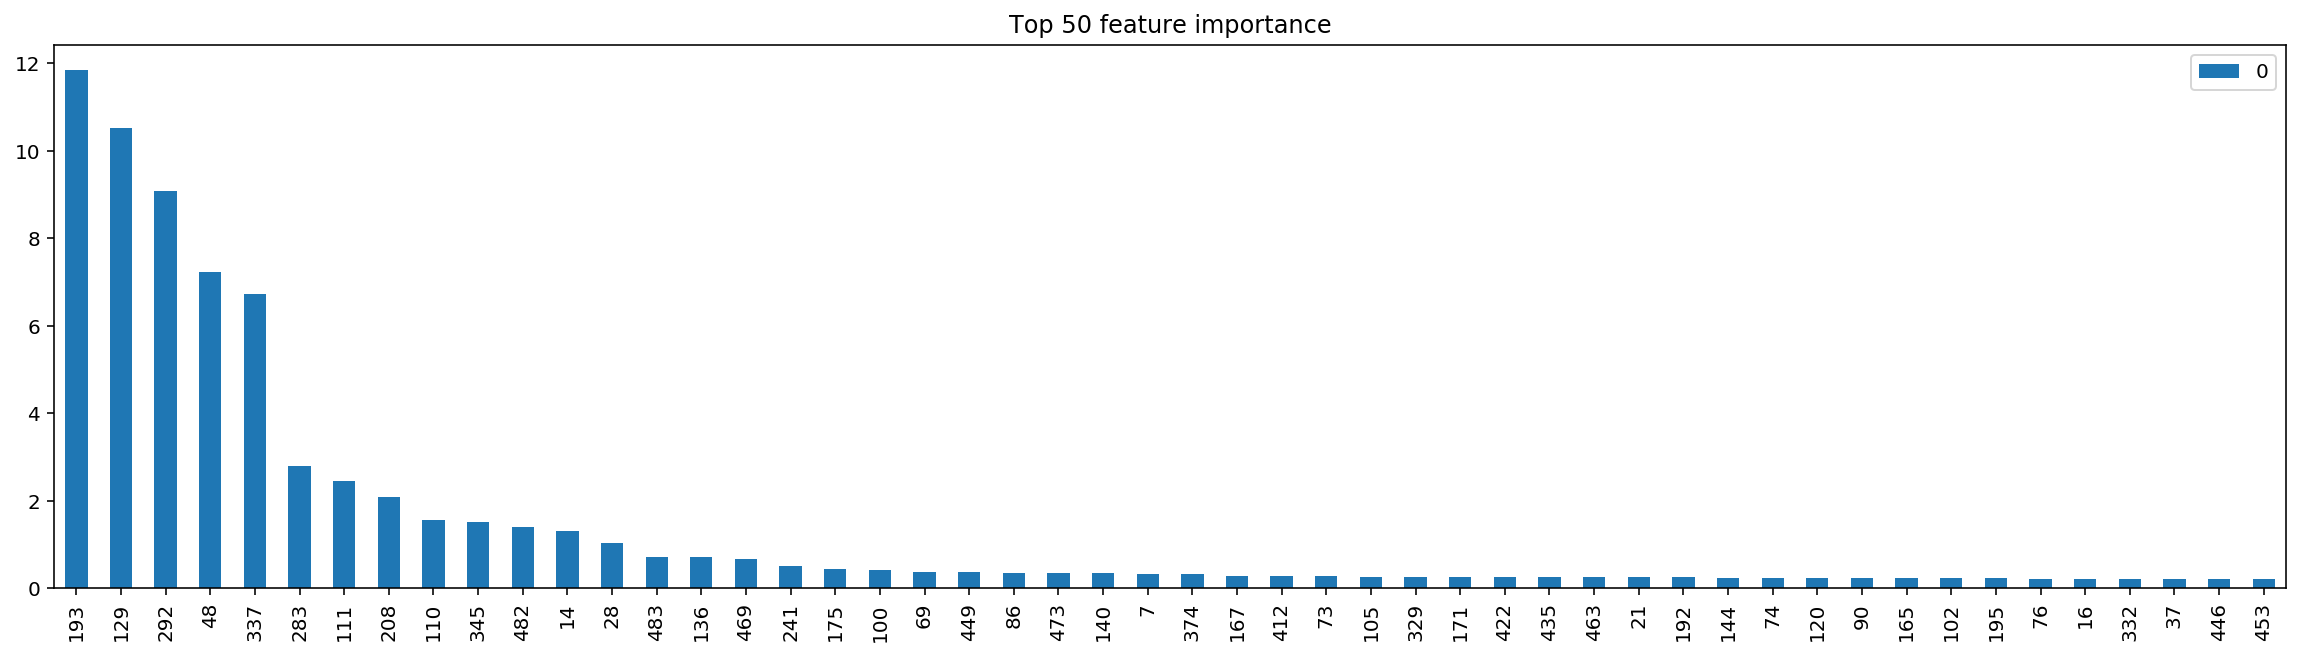

In [6]:
feature_importance.sort_values(0, ascending=False).head(50) \
    .plot(kind='bar', figsize=(20, 5), title='Top 50 feature importance');

In the task statement it is said that cross-validation is being performed in *inverse* manner: we train on small amount of data (1000 samples) and validate on much larger data (9000 samples), so it is easy to overfit in this setting. The more features we have, the easier it is to overfit. Although we are constrained to select no more than 50 most important features, but we also could try to select less, and submit 40, 30, 20 top features. Indeed sending only 20 features gives us best result and we get 4 points (max for the task) on the leaderboard.

In [13]:
print(*list(feature_importance[0].sort_values(ascending=False).index[:20].values))

193 129 292 48 337 283 110 111 208 345 14 482 241 469 28 136 483 90 175 471
